In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch as T
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

C:\Users\fayyo\.conda\envs\deep_learning\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\fayyo\.conda\envs\deep_learning\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [36]:
train_transform = train_transforms = transforms.Compose([transforms.Resize(96),
                                       transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(80),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5],
                                                            [0.5, 0.5, 0.5])])

# test_transform = transforms.Compose( [transforms.Resize(128),
#                                       transforms.CenterCrop(100),
#                                       transforms.ToTensor(),
#                                       transforms.Normalize([0.5, 0.5, 0.5],
#                                                            [0.5, 0.5, 0.5])] )

train_data = datasets.ImageFolder('data/train', transform=train_transform)

In [16]:
train_dataset= pd.read_csv('train.csv')

In [20]:
train_dataset.head()

,emotion,pixels
0,0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4..."
1,0,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ..."
2,2,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ..."
3,4,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2..."
4,6,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23..."


In [13]:
import numpy as np

In [11]:
def pixels_to_array(pixels):
    array = np.array(pixels.split(),'uint8')
    return array

def image_reshape(data):
    image = np.reshape(data['pixels'].to_list(),(data.shape[0],48,48,1))
    image = np.repeat(image, 3, -1)
    return image

In [17]:
train_dataset['pixels'] = train_dataset['pixels'].apply(pixels_to_array)
# test_dataset['pixels']  = test_dataset['pixels'].apply(pixels_to_array)
# validation_dataset['pixels'] = validation_dataset['pixels'].apply(pixels_to_array)

print("Train:")
print(type(train_dataset['pixels']))
print(train_dataset.shape)

Train:
<class 'pandas.core.series.Series'>
(28709, 2)


In [19]:
X_train = image_reshape(train_dataset)
X_train

array([[[[ 70,  70,  70],
         [ 80,  80,  80],
         [ 82,  82,  82],
         ...,
         [ 52,  52,  52],
         [ 43,  43,  43],
         [ 41,  41,  41]],

        [[ 65,  65,  65],
         [ 61,  61,  61],
         [ 58,  58,  58],
         ...,
         [ 56,  56,  56],
         [ 52,  52,  52],
         [ 44,  44,  44]],

        [[ 50,  50,  50],
         [ 43,  43,  43],
         [ 54,  54,  54],
         ...,
         [ 49,  49,  49],
         [ 56,  56,  56],
         [ 47,  47,  47]],

        ...,

        [[ 91,  91,  91],
         [ 65,  65,  65],
         [ 42,  42,  42],
         ...,
         [ 72,  72,  72],
         [ 56,  56,  56],
         [ 43,  43,  43]],

        [[ 77,  77,  77],
         [ 82,  82,  82],
         [ 79,  79,  79],
         ...,
         [105, 105, 105],
         [ 70,  70,  70],
         [ 46,  46,  46]],

        [[ 77,  77,  77],
         [ 72,  72,  72],
         [ 84,  84,  84],
         ...,
         [106, 106, 106],
        

In [14]:
pixels_to_array(a.pixels[0])

array([ 70,  80,  82, ..., 106, 109,  82], dtype=uint8)

In [15]:
image_reshape(a)

ValueError: cannot reshape array of size 28709 into shape (28709,48,48,1)

In [22]:
train = pd.read_csv('train.csv')
print(train.shape)

(28709, 2)


In [23]:
emotion_prop = (train.emotion.value_counts() / len(train)).to_frame().sort_index(ascending=True)

emotion_prop

,emotion
0,0.139155
1,0.015187
2,0.142708
3,0.251315
4,0.168240
5,0.110453
6,0.172942


In [24]:
emotions = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']


In [25]:
def pixels_to_array(pixels):
    array = np.array(pixels.split(),'float64')
    return array

def image_reshape(data):
    image = np.reshape(data['pixels'].to_list(),(data.shape[0],48,48,1))
    return image

In [26]:
train['pixels'] = train['pixels'].apply(pixels_to_array)
X = image_reshape(train)
y = train['emotion']

In [28]:
import matplotlib.pyplot as plt

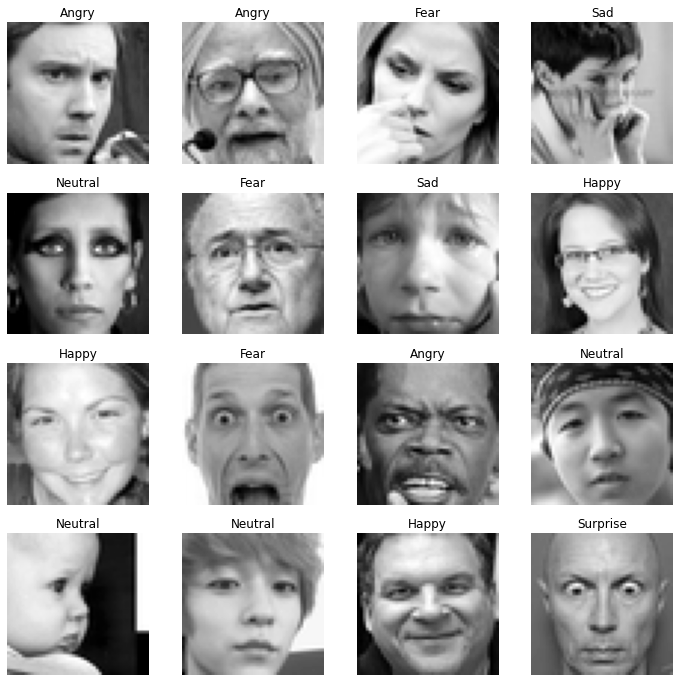

In [32]:
plt.figure(figsize=[12,12])
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i],cmap="gray")
    plt.title(emotions[y[i]])
    plt.axis("off")
plt.show()